In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr
from scipy.stats import norm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-software-engineer-jobs/us-software-engineer-jobs-zenrows.csv


# What is the best stratgies for F1 visa holder to land a SWE position with sponsorship
1. What is the typical salary of postions with sponsorship?
2. Which kind of positions do company sponse visa most? 
3. Which company sponse visa most? 
4. Which state has most SWE positions with visa sponsership? 
5. Is it more difficult to find a full-time job with visa sponsership comparing to internship?
6. How is the rating of company who provides visa sponsorshiped?
7. Do people feel well with more salary?

# Data exploration
1. Metadate of the dataset<br>
2. Drop duplicated rows and columns will not be used in this analysis<br>

In [2]:
# Import data
df = pd.read_csv("/kaggle/input/us-software-engineer-jobs/us-software-engineer-jobs-zenrows.csv")

In [3]:
# Overview of dataset 
df.info()
pd.set_option('display.max_columns', None)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58433 entries, 0 to 58432
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  58433 non-null  object 
 1   company                58430 non-null  object 
 2   salary                 18103 non-null  object 
 3   rating                 58433 non-null  float64
 4   review_count           58433 non-null  int64  
 5   types                  42577 non-null  object 
 6   location               58433 non-null  object 
 7   relative_time          58433 non-null  object 
 8   hires_needed           11857 non-null  object 
 9   hires_needed_exact     18439 non-null  object 
 10  urgently_hiring        58433 non-null  bool   
 11  remote_work_model      22804 non-null  object 
 12  snippet                58425 non-null  object 
 13  dradis_job             58433 non-null  bool   
 14  link                   58433 non-null  object 
 15  ne

,title,company,salary,rating,review_count,types,location,relative_time,hires_needed,hires_needed_exact,urgently_hiring,remote_work_model,snippet,dradis_job,link,new_job,job_link,sponsored,featured_employer,indeed_applyable,ad_id,remote_location,source_id,hiring_event_job,indeed_apply_enabled,job_location_postal,company_overview_link,activity_date,location_extras
0,Android Developer,Shockoe,NaN,0.0,0,Full-time,"Richmond, VA",30+ days ago,NaN,NaN,False,NaN,"Throughout the day, you will collaborate with ...",False,/rc/clk?jk=8ac8939f4510ebb0&fccid=b6b321949667...,False,/m/basecamp/viewjob?viewtype=embedded&jk=8ac89...,False,False,False,NaN,False,11706594,False,False,NaN,NaN,NaN,NaN
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",0.0,0,Full-time,"Louisville, KY",30+ days ago,ONE,1,True,NaN,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,True,/pagead/clk?mo=r&ad=-6NYlbfkN0DHIU8kRLE0yitaMK...,False,/m/basecamp/viewjob?viewtype=embedded&jk=cf2dd...,True,False,True,370154371.0,False,11468052,False,True,40219.0,NaN,Active 2 days ago,NaN
2,Sr. Android Developer,The Cervantes Group,NaN,4.1,22,Full-time,Remote,6 days ago,TWO_FOUR,2,False,REMOTE_ALWAYS,This person will be a senior member of the tea...,True,/company/The-Cervantes-Group/jobs/Senior-Andro...,True,/m/basecamp/viewjob?viewtype=embedded&jk=ce53e...,False,False,True,NaN,False,9570478,False,True,NaN,/cmp/The-Cervantes-Group,Active 3 days ago,NaN
3,Junior Software Engineer,Medical Knowledge Group,NaN,0.0,0,Full-time,Remote,8 days ago,ONE,1,True,REMOTE_ALWAYS,The ideal candidate will have a skill for toug...,True,/pagead/clk?mo=r&ad=-6NYlbfkN0B8NUZbSwcbsGjRz9...,False,/m/basecamp/viewjob?viewtype=embedded&jk=d324e...,True,True,True,368864426.0,False,501562,False,True,NaN,NaN,Active 3 days ago,NaN
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,4.1,548,Full-time,"Kansas City, MO",2 days ago,NaN,NaN,False,NaN,Proficiency in Agile software development prin...,False,/rc/clk?jk=8f941bc420d659d2&fccid=2c6850e24c8a...,True,/m/basecamp/viewjob?viewtype=embedded&jk=8f941...,False,False,False,NaN,False,1439,False,False,NaN,/cmp/Federal-Reserve-Bank-of-New-York,NaN,NaN


In [4]:
# Check amount of missing values and percentage
null_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

title                     0.000000
company                   0.005134
salary                   69.019219
rating                    0.000000
review_count              0.000000
types                    27.135352
location                  0.000000
relative_time             0.000000
hires_needed             79.708384
hires_needed_exact       68.444201
urgently_hiring           0.000000
remote_work_model        60.974107
snippet                   0.013691
dradis_job                0.000000
link                      0.000000
new_job                   0.000000
job_link                  0.000000
sponsored                 0.000000
featured_employer         0.000000
indeed_applyable          0.000000
ad_id                    59.567368
remote_location           0.000000
source_id                 0.000000
hiring_event_job          0.000000
indeed_apply_enabled      0.000000
job_location_postal      55.297520
company_overview_link    37.886126
activity_date            76.381497
location_extras     

In [5]:
# Drop columns will not be use
df = df.drop(columns = ["review_count","snippet","link","job_link","company_overview_link","ad_id","source_id"])
# Drop columns with more than 80% missing values
df = df.drop(columns = ["hires_needed","hires_needed_exact","activity_date","location_extras"])
# Drop duplicate Row
df = df.drop_duplicates()

# Clean and Normalize data

## Salary
Separate salary columns into three columns- yearly, monthly,and hourly salaries. Turning values in these three columns into numerical values by counting the mean of the original columns.

In [6]:
# Functions to normalzie salaries
def normalize_yearly_salary(x):
    try:
        if x.endswith("a year"):
            yearly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(yearly_salary)):
                yearly_salary[i] = int(yearly_salary[i].replace(",", ""))
            return np.mean(yearly_salary)
    except:
        pass

def normalize_weekly_salary(x):
    try:
         if x.endswith('a week'):
            weekly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(weekly_salary)):
                weekly_salary[i] = int(weekly_salary[i].replace(",", ""))
            return np.mean(weekly_salary) 
    except:
        pass

def normalize_hourly_salary(x):
    try:
         if x.endswith("an hour"):
            hourly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(hourly_salary)):
                hourly_salary[i] = int(hourly_salary[i].replace(",", ""))
            return np.mean(hourly_salary) 
    except:
        pass
    
# Normalize salary
df["yearly_salary"] = df["salary"].apply(normalize_yearly_salary)
df["weekly_salary"] = df["salary"].apply(normalize_weekly_salary)
df["hourly_salary"] = df["salary"].apply(normalize_hourly_salary)

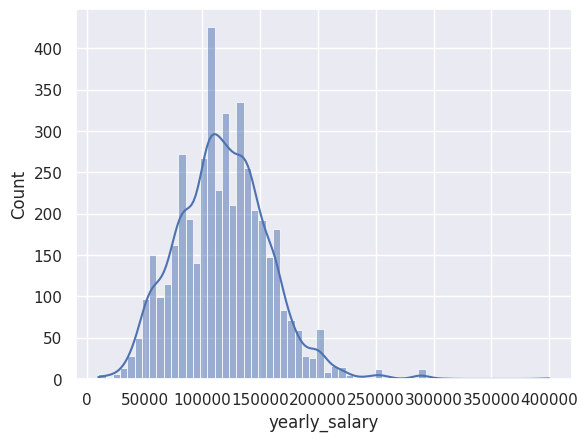

In [7]:
# Visualization of yearly salary columns
sns.set()
sns.set_palette("deep")
sns.histplot(data = df["yearly_salary"], kde = True)
plt.show()

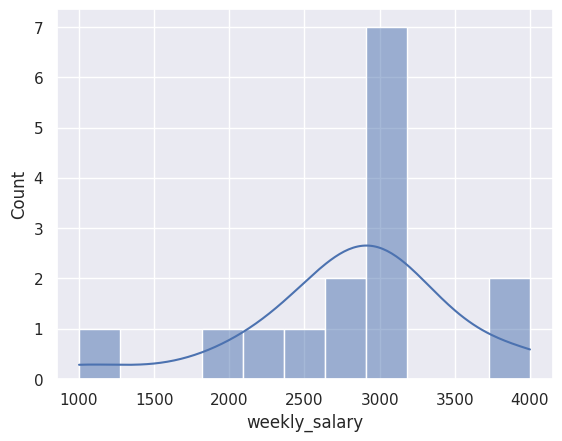

In [8]:
# Visualization of weekly salary columns
sns.histplot(data=df["weekly_salary"], kde=True)
plt.show()

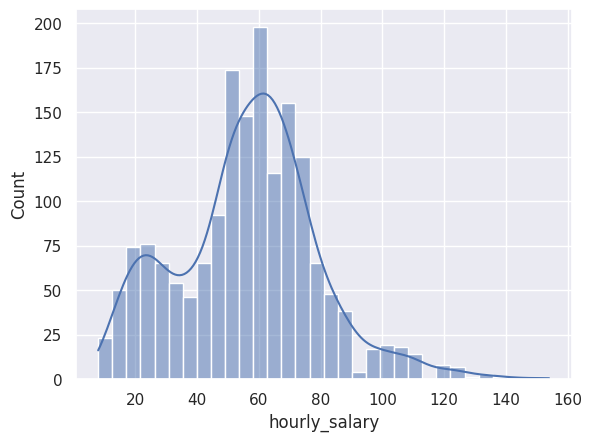

In [9]:
# Visualization of hourly salary columns
sns.histplot(data = df["hourly_salary"], kde = True)
plt.show()

### Imputing missing value
Imputing missing value in the yearly_salary columns by implementing boost strape resampling

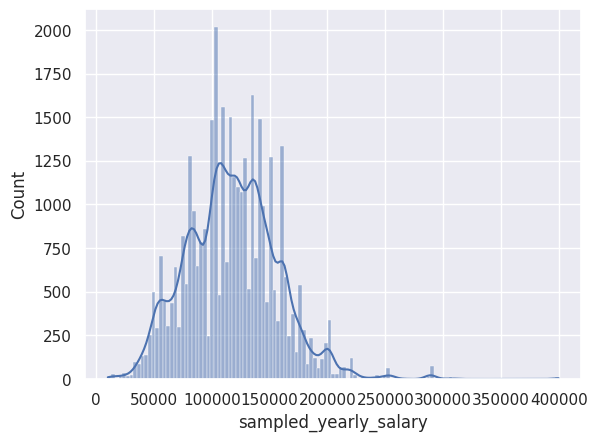

In [10]:
# Imputing missing value by simple random resample
yearly_salary_sample = df["yearly_salary"].dropna().sample(n = len(df["yearly_salary"].isnull()), replace = True, random_state = 456777).tolist()
yearly_salary_missing_index = df[df["yearly_salary"].isnull()].index.tolist()
df["sampled_yearly_salary"] = df["yearly_salary"]

# Filling the missing value
counts = 0
for i in yearly_salary_missing_index:
    df.loc[i ,"sampled_yearly_salary"] = yearly_salary_sample[counts]  
    counts += 1

# Histagram of anunal salary after imputation
sns.histplot(data=df["sampled_yearly_salary"], kde = True)
plt.show()

11250.0 221250.0


<Axes: xlabel='sampled_yearly_salary'>

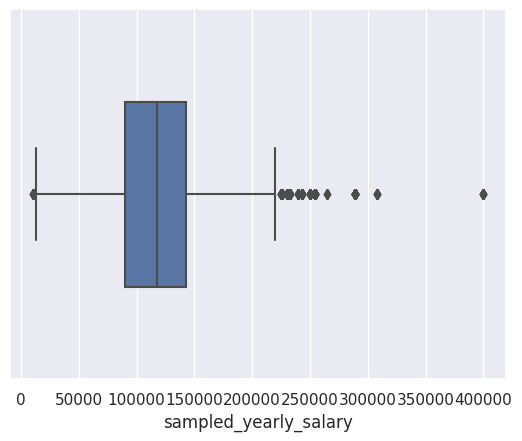

In [11]:
# Define the IQR, mean, and standard deviation for finding outlier
yearly_salary_mean = df["sampled_yearly_salary"].mean()
yearly_salary_std = df["sampled_yearly_salary"].std()
yearly_salary_Q1 = np.quantile(df["sampled_yearly_salary"], 0.25)
yearly_salary_Q3 = np.quantile(df["sampled_yearly_salary"], 0.75)
yearly_salary_IQR = yearly_salary_Q3 - yearly_salary_Q1
lower_bound = yearly_salary_Q1 - 1.5 * yearly_salary_IQR
higher_bound = yearly_salary_Q3 + 1.5 * yearly_salary_IQR

print(lower_bound, higher_bound)
sns.boxplot(df, x = "sampled_yearly_salary", width = 0.5)

## Location
Extract states information from location columns.

In [12]:
# Functions to seperate states values from location
def seperate_state_info(x):    
    regex = re.compile(r"[A-Z]{2}$")
    states_abb = {
            'AK': 'Alaska',
            'AL': 'Alabama',
            'AR': 'Arkansas',
            'AS': 'American Samoa',
            'AZ': 'Arizona',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DC': 'District of Columbia',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'GU': 'Guam',
            'HI': 'Hawaii',
            'IA': 'Iowa',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'MA': 'Massachusetts',
            'MD': 'Maryland',
            'ME': 'Maine',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MO': 'Missouri',
            'MP': 'Northern Mariana Islands',
            'MS': 'Mississippi',
            'MT': 'Montana',
            'NA': 'National',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'NE': 'Nebraska',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NV': 'Nevada',
            'NY': 'New York',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'PR': 'Puerto Rico',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VA': 'Virginia',
            'VI': 'Virgin Islands',
            'VT': 'Vermont',
            'WA': 'Washington',
            'WI': 'Wisconsin',
            'WV': 'West Virginia',
            'WY': 'Wyoming'
    }
    
    if re.search(regex, x):
        state = re.findall(regex, x)
        x = state[0]
    elif x == "Washington State":
        x = "WA"
    elif x == "New York State":
        x = "NY"
    elif x == "United States":
        x = None
    else:
        for key, state_name in states_abb.items():
            if state_name == x:
                x = key
    return x

# Create states columns
df["states"] = df["location"].apply(seperate_state_info)
# pd.set_option("display.max_rows", None)
# df.states.value_counts(ascending=True)

## Sponsored
Create a column with sponsored information as categorical values.

In [13]:
# Function to turn boolean into sting
def categorize_sponsored(x):
    if x == True: 
        x = "sponsored"
    else:
        x = "not_sponsored"
    return x
# Create a coulumns to store categorical sponsorship data
df["sponsored_categorical"] = df["sponsored"].apply(categorize_sponsored)

# Data Visualization and Analysis

## What is the typical annual salary of postions?
The mode of annual salary for SWE position is 110,000 dollar. The mode of annual salary for SWE position with sponsorship is 140,000 dollars. The distribution of the position with sponsorship is close to the distribution of all position. However, when it comes to annaul salary more than 280,000 dolloars, the proportion of position with sponsorship drop. It shows that it is more difficult for F1 visa holder to land a potsiton with more than annual salary above 280,000 dollars.

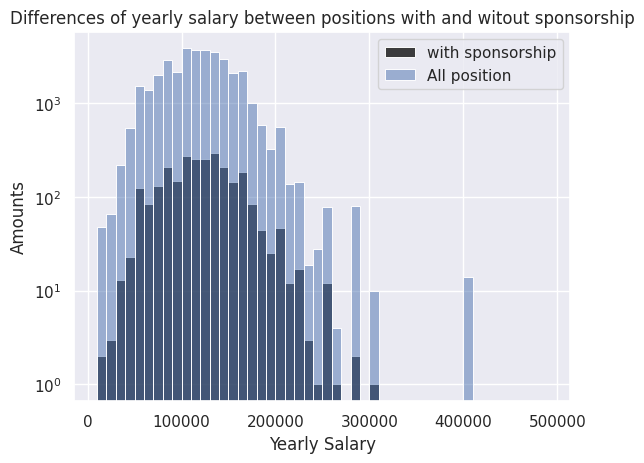

In [25]:
# Historgram of ananual salary for 
job_with_sponsorship = df[df["sponsored"] == True]
sns.set_palette("deep")
sns.histplot(job_with_sponsorship["sampled_yearly_salary"], label = "with sponsorship", color = "black", bins = np.arange(10000, 500000, 10000))
sns.histplot(df["sampled_yearly_salary"], label = "All position",alpha = 0.5, bins = np.arange(10000, 450000, 10000))
plt.xlabel("Yearly Salary")
plt.ylabel("Amounts")
plt.yscale("log")
plt.title("Differences of yearly salary between positions with and witout sponsorship")
plt.legend()
plt.show()

## Which state has the most opportunities of visa sponsorship?
The mode of the position with sponsorship is remote,following by California and Taxus. It means a F1 visa holder can focus on landing a remote position. When it comes to the porpotion between postion with and without sponsorship, remote position is the highest. 

In [16]:
# Group the data by states and extact values in the sponsored column
grouped_data = df.groupby("states")["sponsored"].sum().reset_index()
# Sort the value
grouped_data = grouped_data.sort_values(by = "sponsored", ascending = False).reset_index(drop = True)

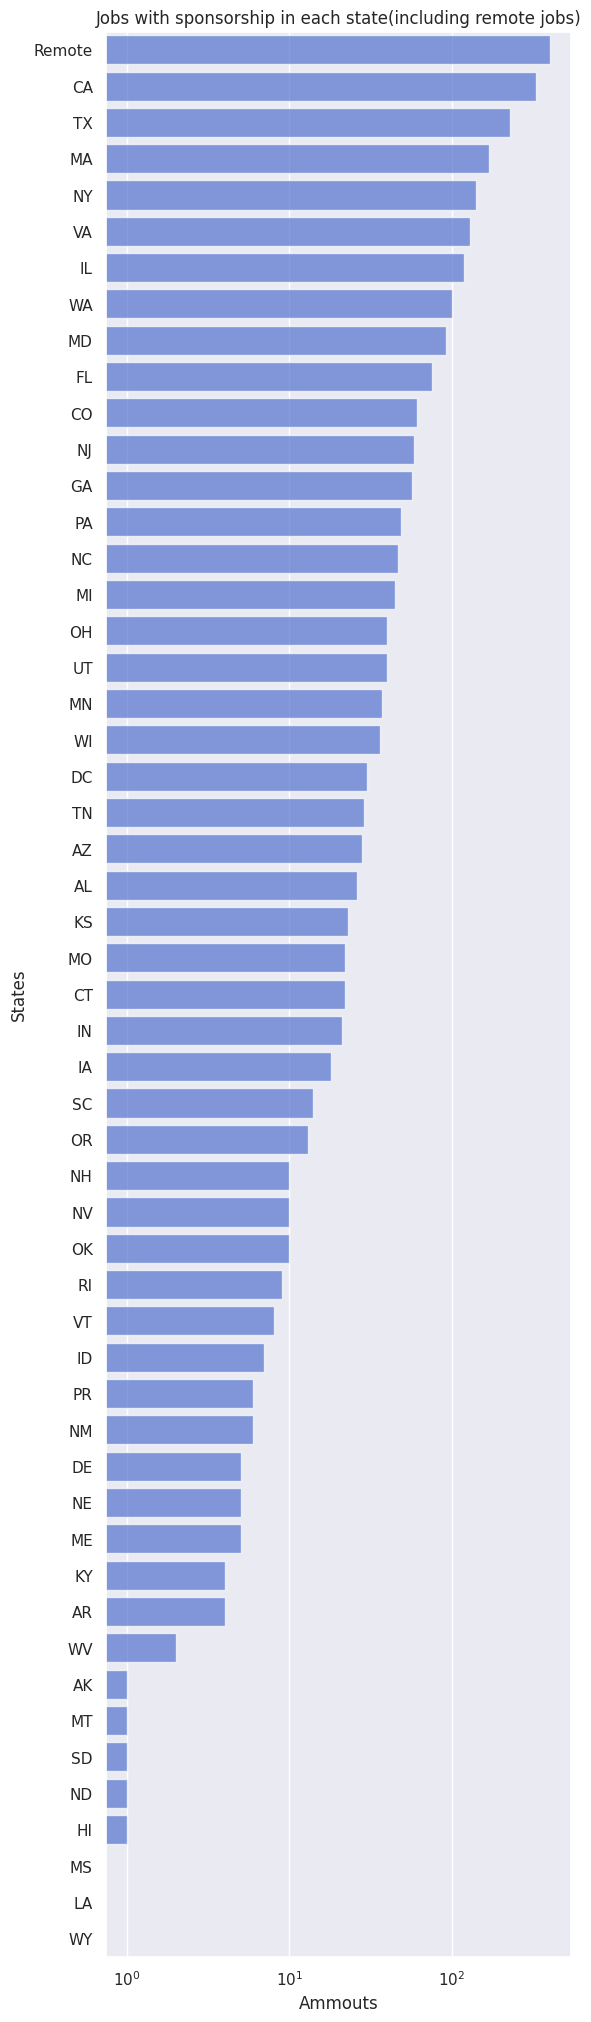

In [17]:
plt.figure(figsize=(6, 25))
sns.barplot(grouped_data, x = "sponsored", y = "states", color = "royalblue", alpha = 0.7)
plt.xscale("log")
plt.xlabel("Ammouts")
plt.ylabel("States")
plt.title("Jobs with sponsorship in each state(including remote jobs)")
plt.show()

In [18]:
# Create a dataframe for jobs in each state
total_jobs = df["states"].value_counts().reset_index()
total_jobs.columns = ["states", "total_jobs"]

# Create a dataframe for jobs with sponsorship in each state
sponsored_jobs = df[df["sponsored"] == True]["states"].value_counts().reset_index()
sponsored_jobs.columns = ["states", "job_with_sponsorship"]

# Merge two dataframe
merged_counts = total_jobs.merge(sponsored_jobs, on = "states", how = "outer").fillna(0)

# Calculate percentages of job with sponsorship in each state
merged_counts["percentage_of_job_with_sponsorship"] = (merged_counts["job_with_sponsorship"] / merged_counts["total_jobs"]) * 100

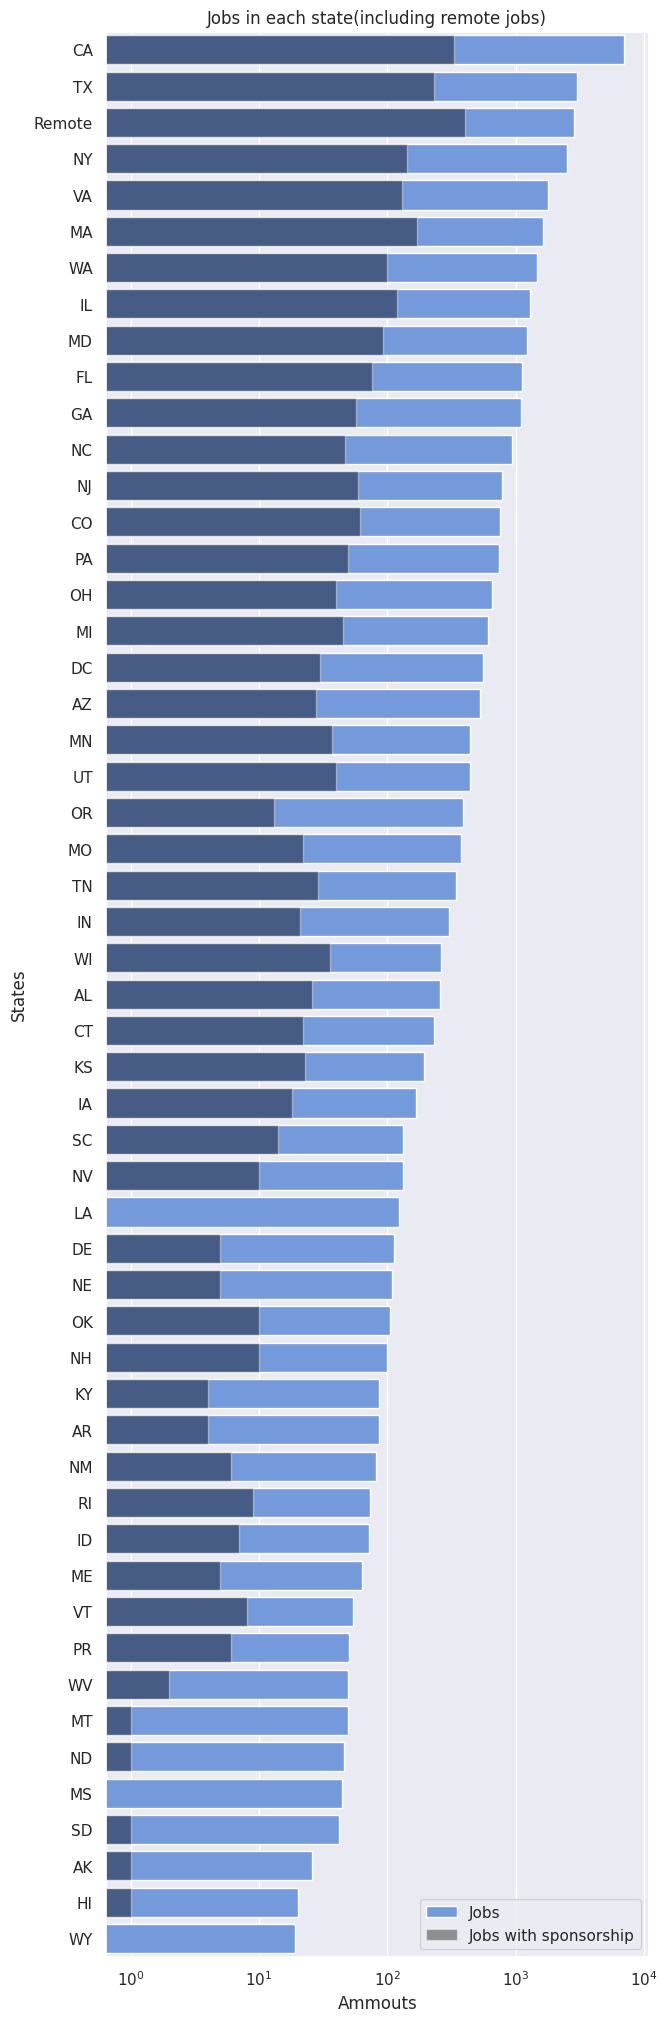

In [28]:
# Barplot of the jobs in each states
plt.figure(figsize = (7, 25))
sns.barplot(merged_counts, x = "total_jobs", y = "states", label = "Jobs", color = "cornflowerblue")
sns.barplot(merged_counts, x = "job_with_sponsorship", y = "states", label = "Jobs with sponsorship", color = "black", alpha = 0.4)
plt.xscale("log")
plt.xlabel("Ammouts")
plt.ylabel("States")
plt.title("Jobs in each state(including remote jobs)")
plt.legend(loc = "lower right")
plt.show()

## Which position have the most opportunities of visa sponsorship?

<Axes: title={'center': 'SWE position with sponsorship'}, xlabel='amounts of position', ylabel='position title'>

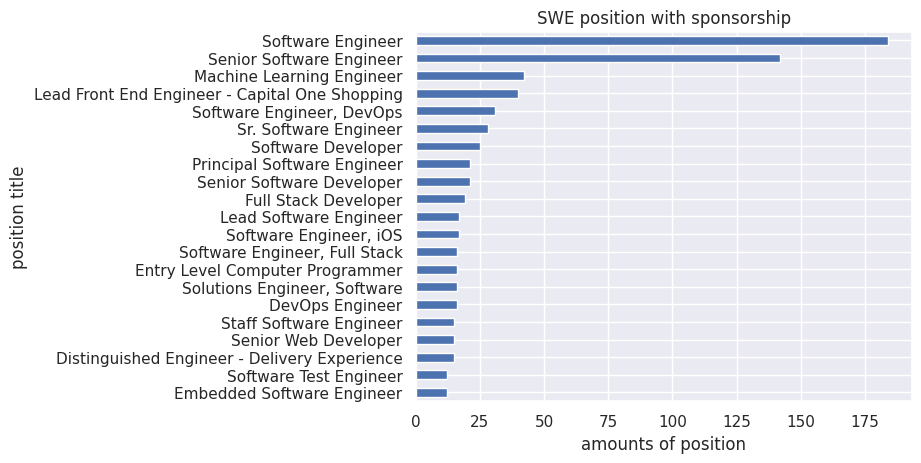

In [20]:
# Barplot with top 20 software position.
job_with_sponsorship = df[df["sponsored"] == True]
job_with_sponsorship["title"].value_counts()[20::-1].plot(kind = "barh", xlabel = "amounts of position", ylabel ="position title", title = "SWE position with sponsorship")

## Which company provides vias sponsoership the most?

<Axes: title={'center': 'Company provided sponsorship'}, xlabel='amounts of position', ylabel='company'>

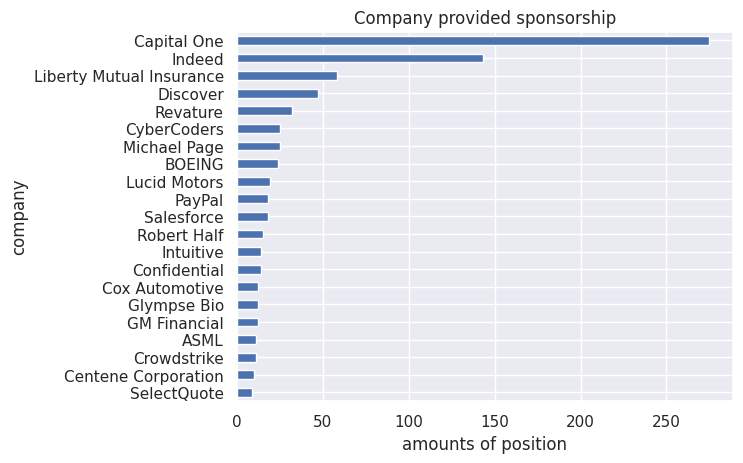

In [21]:
job_with_sponsorship = df[df["sponsored"] == True]
job_with_sponsorship["company"].value_counts()[20::-1].plot(kind = "barh", xlabel = "amounts of position", title = "Company provided sponsorship")

## Is it more difficult to find a full-time job with visa sponsership comparing to internship?
8.5 % of full-time positions provide visa sponsorship, while only 4.5% of part-time positions provide visa sponsorship. It is more difficult for F1 visa holder to land a part-time position comparing to full-time postion. 

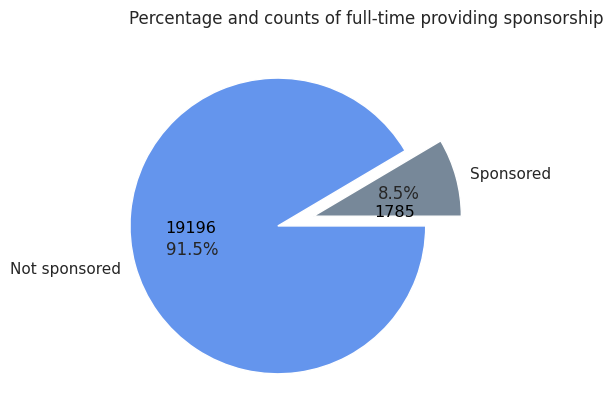

In [22]:
# Function to create list for drawing piechart
def create_list_for_piechart(dataFrame, column):
    percentage = list()
    percentage.append(len(dataFrame[dataFrame[column] == True]))
    percentage.append(len(dataFrame[dataFrame[column] == False]))
    
    return percentage

# Percentages of full-time jobs with sponsorship
df["full_time"] = df["types"].isin(["Full-time"])
full_time_job = df[df["full_time"]]

# Apply function to create list for drawing piechart
percentage_of_fulltime = create_list_for_piechart(full_time_job, "sponsored")

# List for counts of sponsorships
full_time_job_counts = [len(full_time_job[full_time_job["sponsored"] == True]), len(full_time_job[full_time_job["sponsored"] == False])]

plt.pie(percentage_of_fulltime, explode = (0, 0.25), labels = ["Sponsored", "Not sponsored"], autopct = "%1.1f%%", colors = ["lightslategrey", "cornflowerblue"])
plt.annotate(full_time_job_counts[0], (0.55, 0.03), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.annotate(full_time_job_counts[1], (-0.83, -0.08), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.title("Percentage and counts of full-time providing sponsorship", loc = "left")
plt.show()


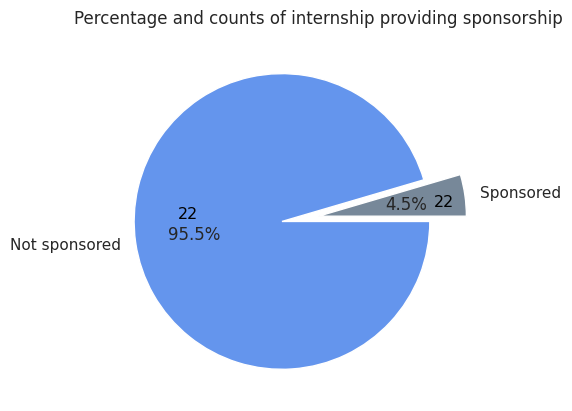

In [23]:
# Percentages of internship with sponsorship
df["Internship"] = df["types"].isin(["Internship"])
internship = df[df["Internship"]]

# Apply function to create list for drawing piechart
percentage_of_internship = create_list_for_piechart(internship, "sponsored")

# List for counts of sponsorships
internship_job_counts = [len(internship["sponsored"] == True), len(internship["sponsored"] == False)]

plt.pie(percentage_of_internship, explode = (0, 0.25), labels = ["Sponsored", "Not sponsored"], autopct = "%1.1f%%", colors = ["lightslategrey","cornflowerblue"])
plt.annotate(internship_job_counts[0], (0.85, 0.1), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.annotate(internship_job_counts[1], (-0.88, 0.02), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.title("Percentage and counts of internship providing sponsorship")
plt.show()

## Do people feel well with more salary?
The person correlation coefficient between annual salary and rating is 0.016. There is no clear relation between two variable. So, the higher salary doesn't come with higher satificaiton.  

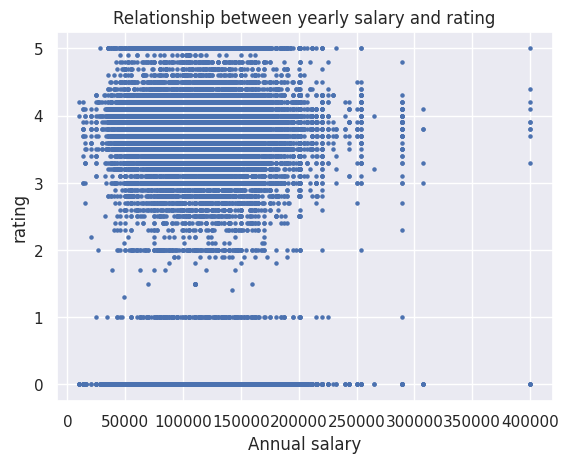

0.016281176611555075 0.0019971942931951234


In [24]:
# Scatterplot of rating and salary
drop_yearly_salary_null = df[df["sampled_yearly_salary"].notnull()]
drop_yearly_salary_null.plot.scatter(x = "sampled_yearly_salary", y = "rating", marker = ".")
plt.xlabel("Annual salary")
plt.title("Relationship between yearly salary and rating")
plt.show()

# Pearson correlation coefficient of two columns
corr_coef, pvalue = pearsonr(drop_yearly_salary_null["sampled_yearly_salary"], drop_yearly_salary_null["rating"])
print(corr_coef, pvalue)